In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

In [2]:
# gráfico qui quadrado - generalização dos qqplots
notas = pd.read_csv('notas_3.csv')

In [3]:
X = notas.values
X

array([[ 17.2,  16.7,  15.8],
       [ 16.8,  15. ,  17.2],
       [ 25. ,  24.6,  24.2],
       [ 19. ,  17.5,  18. ],
       [ 21. ,  24.8,  20.8],
       [ 15.6,  13.4,  16.2],
       [ 19. ,  23.4,  22.8],
       [ 22.5,  24.3,  23.5],
       [ 18.2,  20.3,  19.6],
       [ 16.7,  17.5,  15.7],
       [ 22.6,  20.2,  23.6],
       [ 22. ,  20.6,  21.9],
       [ 15.8,  16.3,  17.7],
       [ 15.5,  17.8,  17.7],
       [ 21.3,  24.8,  22.9],
       [ 21.2,  21.5,  18.9],
       [ 23. ,  24.1,  23.5],
       [ 22.7,  18.9,  20.6],
       [ 19.6,  23.3,  20.7]])

In [4]:
n = X.shape[0]
p = X.shape[1]

In [5]:
# vetor de médias
Xb = np.mean(X, axis=0)
print(Xb)

[ 19.72105263  20.26315789  20.06842105]


In [6]:
S = np.cov(X.T)

Quando $n$ é grande, a variável
  \begin{align*}
  d^2_i = (\boldsymbol{X}_{i\bullet} - \boldsymbol{\bar{X}})^T \boldsymbol{S}^{-1} (\boldsymbol{X}_{i\bullet} - \boldsymbol{\bar{X}}), \quad i=1, \dots, n \quad \sim \chi^2_p,
  \end{align*}
  em que $\boldsymbol{X}_{i\bullet}$ representa os valores observados das $p$ variáveis da $i$-ésima u.a., $\boldsymbol{\bar{X}}$ é o vetor de médias amostrais e $\boldsymbol{S}^{-1}$ é a inversa da matriz de covariâncias amostral.

In [7]:
d = np.zeros(n)
for i in range(n):
    di = (X[i] - Xb).T @ np.linalg.inv(S) @ (X[i] - Xb)
    d[i] = di
d

array([ 2.92802312,  2.29895601,  3.37423555,  1.15845536,  3.79399563,
        3.90507   ,  5.23460311,  1.46980205,  0.7155708 ,  3.33015852,
        5.28374129,  1.40007882,  2.58607252,  2.81967784,  2.03344949,
        4.03970647,  1.45792953,  4.30072391,  1.86974999])

In [8]:
dord = np.sort(d)
dord

array([ 0.7155708 ,  1.15845536,  1.40007882,  1.45792953,  1.46980205,
        1.86974999,  2.03344949,  2.29895601,  2.58607252,  2.81967784,
        2.92802312,  3.33015852,  3.37423555,  3.79399563,  3.90507   ,
        4.03970647,  4.30072391,  5.23460311,  5.28374129])

In [9]:
q = np.zeros(n)
for i in range(n):
    v = ((i + 1) - 0.5) / n
    vq = stats.chi2.ppf(v, p)
    q[i] = vq
q

array([ 0.22364872,  0.49013807,  0.72029179,  0.9399017 ,  1.15773547,
        1.37873726,  1.60659781,  1.84466843,  2.09644855,  2.36597388,
        2.65825311,  2.97988552,  3.34006423,  3.75238213,  4.23843266,
        4.83596164,  5.62098258,  6.78867304,  9.23570463])

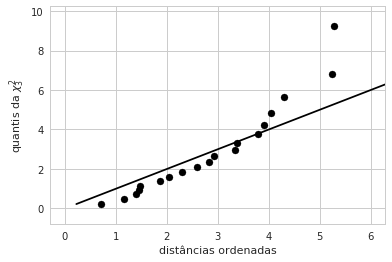

In [10]:
plt.scatter(dord, q, c='black')
plt.xlim(dord.min() - 1, dord.max() + 1)
plt.ylim(q.min() - 1, q.max() + 1)
plt.plot(q, q, c='black')   # plotar a reta x = q
plt.xlabel('distâncias ordenadas')
plt.ylabel(r'quantis da $\chi^2_{3}$');

In [11]:
dados = {'distancias': dord, 'quantis_esperados': q}
qq = pd.DataFrame(dados)
qq

,distancias,quantis_esperados
0,0.715571,0.223649
1,1.158455,0.490138
2,1.400079,0.720292
3,1.457930,0.939902
4,1.469802,1.157735
5,1.869750,1.378737
6,2.033449,1.606598
7,2.298956,1.844668
8,2.586073,2.096449
9,2.819678,2.365974


In [12]:
mg = pd.read_csv('imrs.csv')

In [13]:
mg.head()

,ibge7,meso,nome_meso,micro,nome_micro,mun,tx_mort_acid_15_29,tx_mort_hom_15_29,tx_mort_mama,tx_mort_inf,...,rdpc,renocup,perc_rdpc_140,fam_pbf,tx_emp_form,rend_pc_form,pib_pc,perc_agro,perc_serv,tx_ativ_18m
0,3100104,3105,Triângulo Mineiro/Alto Paranaíba,31019,Patrocínio,Abadia dos Dourados,66.53,0.00,0.00,0.00,...,596.18,920.10,7.94,589,22.9,114.28,11744.69,37.90,26.86,65.97
1,3100203,3106,Central Mineira,31024,Três Marias,Abaeté,56.22,0.00,8.73,27.27,...,707.24,930.85,6.69,1428,27.5,172.19,11466.39,22.08,40.06,65.90
2,3100302,3112,Zona da Mata,31061,Manhuaçu,Abre Campo,30.90,0.00,0.00,27.21,...,444.32,685.72,23.33,1293,20.1,117.72,7998.32,45.80,31.92,63.80
3,3100401,3112,Zona da Mata,31060,Ponte Nova,Acaiaca,0.00,0.00,0.00,20.83,...,357.03,646.71,26.53,389,11.7,61.49,6049.45,25.16,41.87,57.71
4,3100500,3108,Vale do Rio Doce,31039,Ipatinga,Açucena,0.00,34.13,0.00,19.61,...,325.42,514.60,30.70,1172,10.3,52.78,5603.93,41.22,29.89,54.21


In [14]:
# selecionar microrregião de Varginha
vgn = mg.query('nome_micro == "Varginha"')
vgn.head()

,ibge7,meso,nome_meso,micro,nome_micro,mun,tx_mort_acid_15_29,tx_mort_hom_15_29,tx_mort_mama,tx_mort_inf,...,rdpc,renocup,perc_rdpc_140,fam_pbf,tx_emp_form,rend_pc_form,pib_pc,perc_agro,perc_serv,tx_ativ_18m
75,3107109,3110,Sul/Sudoeste de Minas,31050,Varginha,Boa Esperança,60.75,19.07,25.98,14.93,...,599.17,903.37,8.43,2835,24.8,140.03,13127.48,28.65,39.28,64.92
117,3110905,3110,Sul/Sudoeste de Minas,31050,Varginha,Campanha,25.91,0.00,13.03,6.21,...,686.16,1021.62,6.55,786,27.3,149.06,10611.67,33.56,29.17,70.14
122,3111309,3110,Sul/Sudoeste de Minas,31050,Varginha,Campo do Meio,0.00,32.32,17.71,26.09,...,472.71,709.35,8.82,1111,18.5,105.89,7836.89,48.22,28.09,67.53
125,3111606,3110,Sul/Sudoeste de Minas,31050,Varginha,Campos Gerais,29.90,26.98,22.16,3.04,...,503.91,744.47,9.73,2422,18.3,93.65,11985.82,57.93,25.34,70.96
150,3113909,3110,Sul/Sudoeste de Minas,31050,Varginha,Carmo da Cachoeira,32.41,0.00,0.00,33.11,...,525.35,822.31,9.56,987,27.7,133.98,11871.57,47.49,26.25,71.98


In [15]:
vgn.shape

(16, 42)

In [16]:
# zerar os índices
vgn = vgn.reset_index().drop('index', axis=1)

In [17]:
vgn.columns

Index(['ibge7', 'meso', 'nome_meso', 'micro', 'nome_micro', 'mun',
       'tx_mort_acid_15_29', 'tx_mort_hom_15_29', 'tx_mort_mama',
       'tx_mort_inf', 'existe_conselho_saude', 'tx_analf_25m', 'prop_fund_25m',
       'perc_med_25m', 'tx_med_adeq', 'tx_med_lab', 'existe_conselho_educ',
       'tx_crimes_pat', 'tx_crimes_pes', 'tx_hom', 'existe_uni_infra',
       'perc_energia', 'perc_banagua', 'perc_esgoto', 'perc_lixo', 'pop_total',
       'pop_masc', 'pop_fem', 'raz_dep', 'tx_urb', 'tx_fec', 'esp_vida',
       'rdpc', 'renocup', 'perc_rdpc_140', 'fam_pbf', 'tx_emp_form',
       'rend_pc_form', 'pib_pc', 'perc_agro', 'perc_serv', 'tx_ativ_18m'],
      dtype='object')

In [18]:
# pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html
# selecionar apenas as variáveis do tipo float
vgn.select_dtypes(include=['float64'])

,tx_mort_acid_15_29,tx_mort_hom_15_29,tx_mort_mama,tx_mort_inf,tx_analf_25m,prop_fund_25m,perc_med_25m,tx_med_adeq,tx_med_lab,tx_crimes_pat,...,esp_vida,rdpc,renocup,perc_rdpc_140,tx_emp_form,rend_pc_form,pib_pc,perc_agro,perc_serv,tx_ativ_18m
0,60.75,19.07,25.98,14.93,9.6,36.9,23.56,56.4,100.0,25.9,...,76.0,599.17,903.37,8.43,24.8,140.03,13127.48,28.65,39.28,64.92
1,25.91,0.00,13.03,6.21,9.8,39.3,27.33,39.9,79.6,19.4,...,76.0,686.16,1021.62,6.55,27.3,149.06,10611.67,33.56,29.17,70.14
2,0.00,32.32,17.71,26.09,12.5,34.7,23.05,53.5,100.0,61.0,...,75.0,472.71,709.35,8.82,18.5,105.89,7836.89,48.22,28.09,67.53
3,29.90,26.98,22.16,3.04,14.1,32.0,20.41,52.5,100.0,94.2,...,74.0,503.91,744.47,9.73,18.3,93.65,11985.82,57.93,25.34,70.96
4,32.41,0.00,0.00,33.11,12.4,33.4,22.15,34.9,100.0,8.4,...,73.0,525.35,822.31,9.56,27.7,133.98,11871.57,47.49,26.25,71.98
5,0.00,0.00,21.47,32.97,10.4,31.5,21.05,42.8,100.0,32.3,...,75.0,495.77,714.57,13.64,15.1,71.00,11402.89,53.59,24.72,66.81
6,31.99,15.38,7.85,16.08,14.0,36.9,21.83,43.0,100.0,31.7,...,75.0,577.50,921.97,10.46,25.0,155.01,13057.12,31.12,34.04,66.07
7,59.26,0.00,15.17,7.94,10.5,30.0,19.39,53.9,100.0,0.0,...,75.0,487.68,742.73,7.41,18.4,102.09,8945.31,43.65,27.00,66.59
8,0.00,65.00,17.77,7.14,11.8,31.0,17.42,49.0,100.0,26.1,...,75.0,500.79,784.59,6.93,28.5,156.11,9364.19,45.01,22.27,68.14
9,0.00,0.00,0.00,18.52,13.8,38.1,25.87,58.6,100.0,24.5,...,75.0,555.78,854.92,5.17,32.8,194.62,14457.20,40.17,22.52,71.95


In [19]:
# mudando o dataframe para ter só as variáveis float
vgn_num = vgn.select_dtypes(include=['float64'])

In [20]:
vgn_num.shape

(16, 29)

In [21]:
vgn_num.columns

Index(['tx_mort_acid_15_29', 'tx_mort_hom_15_29', 'tx_mort_mama',
       'tx_mort_inf', 'tx_analf_25m', 'prop_fund_25m', 'perc_med_25m',
       'tx_med_adeq', 'tx_med_lab', 'tx_crimes_pat', 'tx_crimes_pes', 'tx_hom',
       'perc_energia', 'perc_banagua', 'perc_esgoto', 'perc_lixo', 'raz_dep',
       'tx_urb', 'tx_fec', 'esp_vida', 'rdpc', 'renocup', 'perc_rdpc_140',
       'tx_emp_form', 'rend_pc_form', 'pib_pc', 'perc_agro', 'perc_serv',
       'tx_ativ_18m'],
      dtype='object')

In [22]:
# transformar em matriz pegando apenas as 10 primeiras variáveis
X = vgn_num.values[:, 0:10]
# mudar o tipo dos dados
# X = np.asarray(X, dtype=float)

In [23]:
n = X.shape[0]
p = X.shape[1]

In [24]:
# vetor de médias
Xb = np.mean(X, axis=0)
print(Xb)

[ 27.280625  11.981875  11.15875   16.220625  11.75      37.2125    24.27625
  49.425     98.5       39.375   ]


In [25]:
S = np.cov(X.T)

In [26]:
d = np.zeros(n)
for i in range(n):
    di = (X[i] - Xb).T @ np.linalg.inv(S) @ (X[i] - Xb)
    d[i] = di
d

array([  8.95748441,  14.04190587,   5.91398167,  10.59044946,
        12.53300887,   9.15451438,   5.66200008,   7.3993542 ,
        12.47587394,  11.68630599,   8.36782018,  11.56877677,
         7.79638179,   8.63171895,   5.66882165,   9.55160179])

In [27]:
dord = np.sort(d)
dord

array([  5.66200008,   5.66882165,   5.91398167,   7.3993542 ,
         7.79638179,   8.36782018,   8.63171895,   8.95748441,
         9.15451438,   9.55160179,  10.59044946,  11.56877677,
        11.68630599,  12.47587394,  12.53300887,  14.04190587])

In [28]:
q = np.zeros(n)
for i in range(n):
    v = ((i + 1) - 0.5) / n     # i + 1 porque o python começa no 0
    vq = stats.chi2.ppf(v, p)
    q[i] = vq
q

array([  3.45057423,   4.76602013,   5.65015079,   6.39283772,
         7.07074228,   7.7191335 ,   8.3596638 ,   9.00899638,
         9.6827897 ,  10.3985483 ,  11.17891371,  12.05714815,
        13.08878572,  14.38246487,  16.21098144,  19.79523515])

In [29]:
dados = {'distancias': dord, 'quantis_esperados': q}
qq = pd.DataFrame(dados)
qq

,distancias,quantis_esperados
0,5.662000,3.450574
1,5.668822,4.766020
2,5.913982,5.650151
3,7.399354,6.392838
4,7.796382,7.070742
5,8.367820,7.719134
6,8.631719,8.359664
7,8.957484,9.008996
8,9.154514,9.682790
9,9.551602,10.398548


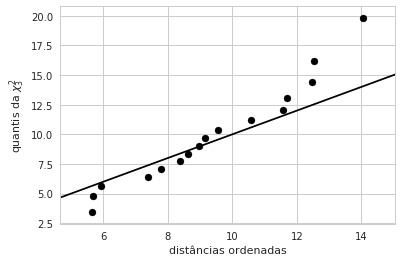

In [30]:
plt.scatter(dord, q, c='black')
plt.plot(q, q, c='black')  # reta x = q, ou seja, se os dados seguirem a qui2, a reta deve corresponder 
                           # aos pontos da qui2 em x e y
plt.xlim(dord.min() - 1, dord.max() + 1)
plt.ylim(q.min() - 1, q.max() + 1)
plt.xlabel('distâncias ordenadas')
plt.ylabel(r'quantis da $\chi^2_{3}$');

### Função

In [31]:
# os dados devem estar no formato de matriz com apenas dados numéricos
def qq_multi(matriz):
    n = X.shape[0]
    p = X.shape[1]
    # vetor de médias
    Xb = np.mean(X, axis=0)
    S = np.cov(X.T)
    # inicializar o vetor de distâncias
    d = np.zeros(n)
    for i in range(n):
        di = (X[i] - Xb).T @ np.linalg.inv(S) @ (X[i] - Xb)
        d[i] = di
    dord = np.sort(d)
    # reta passando pela origem
    z = np.arange(0, dord.max(), 1)
    # inicializar o vetor de quantis
    q = np.zeros(n)
    for i in range(n):
        v = ((i + 1) - 0.5) / n
        vq = stats.chi2.ppf(v, p)
        q[i] = vq
    plt.scatter(dord, q, c='black')
    plt.plot(q, q, c='black')
    plt.xlim(dord.min() - 1, dord.max() + 1)
    plt.ylim(q.min() - 1, q.max() + 1)
    plt.xlabel('distâncias ordenadas')
    plt.ylabel(r'quantis da $\chi^2_{p}$');
    dados = {'distancias': dord, 'quantis_esperados': q}
    qq = pd.DataFrame(dados)
    # return(qq)

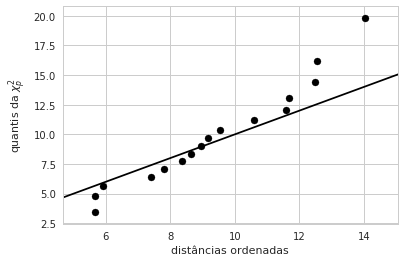

In [32]:
qq_multi(X)

In [33]:
vgn_num.columns

Index(['tx_mort_acid_15_29', 'tx_mort_hom_15_29', 'tx_mort_mama',
       'tx_mort_inf', 'tx_analf_25m', 'prop_fund_25m', 'perc_med_25m',
       'tx_med_adeq', 'tx_med_lab', 'tx_crimes_pat', 'tx_crimes_pes', 'tx_hom',
       'perc_energia', 'perc_banagua', 'perc_esgoto', 'perc_lixo', 'raz_dep',
       'tx_urb', 'tx_fec', 'esp_vida', 'rdpc', 'renocup', 'perc_rdpc_140',
       'tx_emp_form', 'rend_pc_form', 'pib_pc', 'perc_agro', 'perc_serv',
       'tx_ativ_18m'],
      dtype='object')

In [34]:
# transformar em matriz pegando apenas algumas variáveis
variaveis = vgn_num.loc[:, ['esp_vida', 'rdpc', 'pib_pc']]
X = variaveis.values

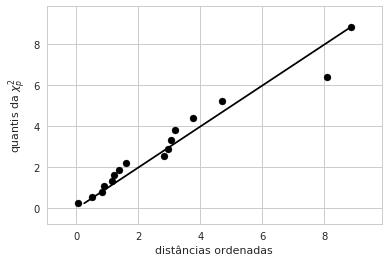

In [35]:
qq_multi(X)

### Distâncias

In [36]:
from scipy.spatial.distance import squareform, pdist

In [37]:
D_e = squareform(pdist(X, metric='euclidean'))

In [38]:
# incluir nomes dos municípios nas distâncias - criar novo dataframe
Dedf = pd.DataFrame(D_e, index=vgn.mun, columns=vgn.mun)

In [39]:
Dedf

mun,Boa Esperança,Campanha,Campo do Meio,Campos Gerais,Carmo da Cachoeira,Coqueiral,Elói Mendes,Guapé,Ilicínea,Monsenhor Paulo,Santana da Vargem,São Bento Abade,São Tomé das Letras,Três Corações,Três Pontas,Varginha
mun,,,,,,,,,,,,,,,,
Boa Esperança,0.000000,2517.313492,5292.101254,1145.629095,1258.081206,1727.687248,73.628245,4183.655929,3764.575839,1330.428115,2027.969815,4074.924677,4571.614223,11034.788952,590.776681,19019.422130
Campanha,2517.313492,0.000000,2782.977893,1386.184434,1270.124744,813.804916,2447.863088,1678.139136,1261.177778,3847.739716,4545.200540,1573.230293,2068.741917,13549.719734,3100.732593,21533.887676
Campo do Meio,5292.101254,2782.977893,0.000000,4149.047431,4035.023875,3566.074559,5221.281662,1108.521086,1527.558109,6620.831150,7318.498219,1218.172784,723.535136,16326.702547,5879.241777,24311.396098
Campos Gerais,1145.629095,1386.184434,4149.047431,0.000000,116.248596,582.987688,1073.825022,3040.553481,2621.632047,2471.924473,3169.511732,2931.189617,3427.593534,12177.904072,1735.756894,20162.611461
Carmo da Cachoeira,1258.081206,1270.124744,4035.023875,116.248596,0.000000,469.616779,1186.698119,2926.503138,2507.501078,2585.809831,3283.493761,2817.379655,3313.930503,12291.720890,1847.498398,20276.426887
Coqueiral,1727.687248,813.804916,3566.074559,582.987688,469.616779,0.000000,1656.247773,2457.593316,2038.706180,3054.899471,3752.497313,2348.204263,2844.630244,12760.879964,2317.018546,20745.588270
Elói Mendes,73.628245,2447.863088,5221.281662,1073.825022,1186.698119,1656.247773,0.000000,4112.790915,3693.726629,1400.248465,2097.955241,4003.904832,4500.533241,11105.457665,663.584585,19090.132145
Guapé,4183.655929,1678.139136,1108.521086,3040.553481,2926.503138,2457.593316,4112.790915,0.000000,419.085107,5512.310675,6209.981029,113.464751,390.788287,15218.188628,4771.055088,23202.885554
Ilicínea,3764.575839,1261.177778,1527.558109,2621.632047,2507.501078,2038.706180,3693.726629,419.085107,0.000000,5093.306859,5790.991800,312.074676,808.386522,14799.146109,4351.990654,22783.838306


In [40]:
# retornar os dois municípios mais diferentes ou mais parecidos de acordo com as variáveis usadas
def compara_dist(df, op='max'):
    if op == 'max':
        maximo = np.amax(df.values)
        a = np.where(df.values == maximo)
    else:
        df = df[df > 0]
        minimo = np.nanmin(df.values)
        a = np.where(df.values == minimo)
    return [df.index[a[0][0]], df.index[a[0][1]]]

In [41]:
# mais parecidos
compara_dist(Dedf,'min')

['Boa Esperança', 'Elói Mendes']

In [42]:
# mais diferentes
compara_dist(Dedf)

['Campo do Meio', 'Varginha']

In [43]:
# comparar os municípios em relação às 10 variáveis selecionadas anteriormente
X = vgn_num.values[:, 0:10]
D_e = squareform(pdist(X, metric='euclidean'))
# incluir nomes dos municípios nas distâncias - criar novo dataframe
Dedf = pd.DataFrame(D_e, index=vgn.mun, columns=vgn.mun)

In [44]:
# mais parecidos
compara_dist(Dedf,'min')

['Monsenhor Paulo', 'Santana da Vargem']

In [45]:
# mais diferentes
compara_dist(Dedf)

['Guapé', 'Três Corações']